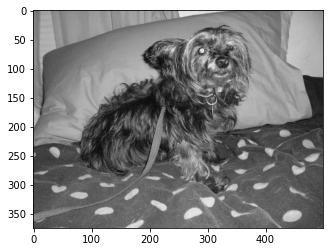

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "G:/Xiles/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  

        break  
    break  

In [3]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [4]:
print(img_array.shape)

(375, 500)


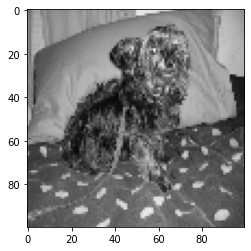

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            
create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [02:55<00:00, 71.30it/s] 

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])
    

1
1
1
0
0
0
1
0
0
0


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 19]
   [  8]
   [  7]
   ...
   [ 89]
   [ 88]
   [ 84]]

  [[ 16]
   [  6]
   [ 13]
   ...
   [ 89]
   [ 90]
   [ 90]]

  [[ 15]
   [  9]
   [ 10]
   ...
   [ 92]
   [ 96]
   [ 92]]

  ...

  [[138]
   [140]
   [135]
   ...
   [121]
   [124]
   [126]]

  [[134]
   [134]
   [135]
   ...
   [120]
   [122]
   [124]]

  [[130]
   [130]
   [134]
   ...
   [120]
   [115]
   [121]]]]


In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X= X/255.0

y=np.array(y)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=16, validation_split=0.1)

Epoch 1/16
702/702 [==============================] - 515s 712ms/step - loss: 0.6884 - accuracy: 0.5355 - val_loss: 0.5866 - val_accuracy: 0.7022
Epoch 2/16
702/702 [==============================] - 420s 599ms/step - loss: 0.5490 - accuracy: 0.7241 - val_loss: 0.4842 - val_accuracy: 0.7768
Epoch 3/16
702/702 [==============================] - 376s 535ms/step - loss: 0.4628 - accuracy: 0.7789 - val_loss: 0.4689 - val_accuracy: 0.7840
Epoch 4/16
702/702 [==============================] - 467s 665ms/step - loss: 0.4061 - accuracy: 0.8176 - val_loss: 0.4129 - val_accuracy: 0.8120
Epoch 5/16
702/702 [==============================] - 380s 542ms/step - loss: 0.3606 - accuracy: 0.8386 - val_loss: 0.3872 - val_accuracy: 0.8277
Epoch 6/16
702/702 [==============================] - 377s 538ms/step - loss: 0.3266 - accuracy: 0.8560 - val_loss: 0.3882 - val_accuracy: 0.8297
Epoch 7/16
702/702 [==============================] - 848s 1s/step - loss: 0.2969 - accuracy: 0.8707 - val_loss: 0.4341 - va

In [21]:
model.save('64x3-CNN.model')

INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


Text(0.5, 1.0, 'Dog')

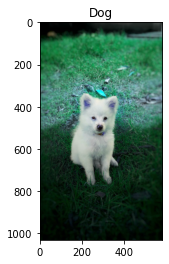

In [11]:
import cv2
import tensorflow as tf

CATEGORIES = ["Dog", "Cat"]

import matplotlib.pyplot as plt

def prepare(filepath):
    IMG_SIZE = 100  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('1.jpeg')])
img_array = cv2.imread('1.jpeg')
plt.imshow(img_array, cmap = 'gray')
plt.title(CATEGORIES[int(prediction[0][0])])